In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show the first 5 lines
# Show the columns and the index of the dataset
# Show the shape of the dataset and the number of observations
pd.set_option('precision', 2)
wage = pd.read_csv('Salary_Data.csv')
print(wage.head(n = 5),'\n')
print(wage.index, wage.columns,'\n')
print(wage.shape,'\n')
print(wage.size,'\n')


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0 

RangeIndex(start=0, stop=30, step=1) Index(['YearsExperience', 'Salary'], dtype='object') 

(30, 2) 

60 



In [2]:
# Show information 
print(wage.info(), '\n')

# Show the dtype of each column
print(wage.dtypes, '\n')

# Check for missing data in the dataset
print(wage.isna().sum(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None 

YearsExperience    float64
Salary             float64
dtype: object 

YearsExperience    0
Salary             0
dtype: int64 



In [3]:
# Show descriptive statistics
print(wage.describe().T,'\n')

# Calculate the correlation matrix
corr = wage.corr()
print(corr,'\n')

# Calculate the covariance matrix
cov = wage.cov()
print(cov)

                 count      mean       std      min       25%      50%  \
YearsExperience   30.0      5.31      2.84      1.1      3.20      4.7   
Salary            30.0  76003.00  27414.43  37731.0  56720.75  65237.0   

                       75%       max  
YearsExperience       7.70      10.5  
Salary           100544.75  122391.0   

                 YearsExperience  Salary
YearsExperience             1.00    0.98
Salary                      0.98    1.00 

                 YearsExperience    Salary
YearsExperience             8.05  7.61e+04
Salary                  76106.30  7.52e+08


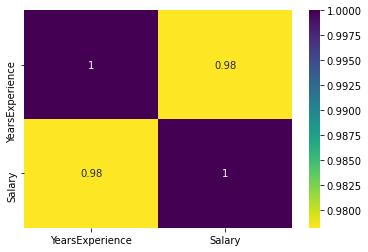

In [4]:
# Make a heat map based on the correlation matrix
sns.heatmap(corr, annot = True,  cmap='viridis_r');


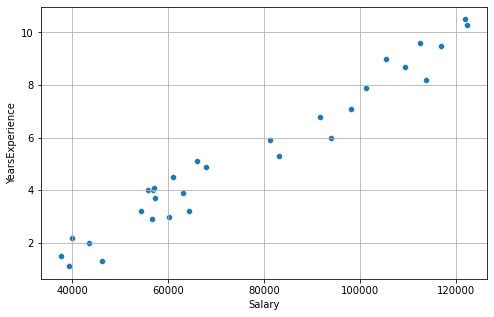

In [5]:
# Make a scatter plot between the variables Salary and Years of Experience
plt.figure(figsize = (8, 5))
sns.scatterplot(data = wage, x = 'Salary', y = 'YearsExperience')
plt.grid()

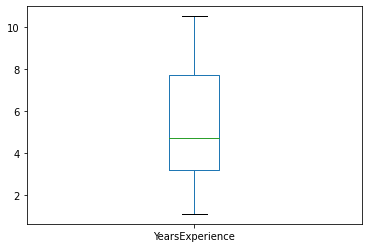

In [6]:
# Generate a boxplot for each variable in the dataset
wage['YearsExperience'].plot(kind = 'box');


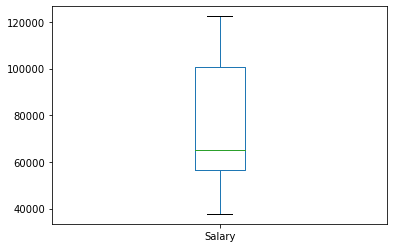

In [7]:
wage['Salary'].plot(kind = 'box');


In [8]:
#  Define the target variable,  Define a predictor variable
x = wage['YearsExperience'].values.reshape(-1, 1)
y = wage['Salary'].values.reshape(-1, 1)

# Use the train_test_split function from sklearn to separate the dataset into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

# Check the shape of the training and test vectors
print(x_train.shape, y_train.shape)
print(y_test.shape, y_test.shape)

(21, 1) (21, 1)
(9, 1) (9, 1)


In [9]:
# Create a linear regression model and adjust to the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Calculate the model determination coefficient
print(f'(R^2): {model.score(x_test, y_test)}')

(R^2): 0.958816457461513


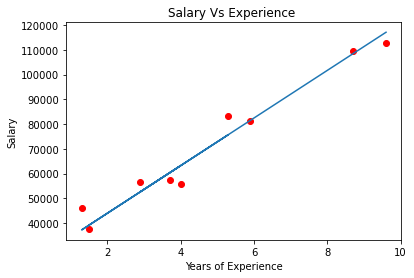

In [11]:
# Generate a graph showing the degree of adjustment of the line to the test data
plt.scatter(x_test, y_test, c= "red")
plt.plot(x_test, model.predict(x_test))
plt.title("Salary Vs Experience ")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [12]:
# Estimate the model using the OLS method, to do so use the statsmodels library
import statsmodels.api as sm

Y = wage['Salary']
X = wage['YearsExperience']
X = sm.add_constant(X)
OLS_model = sm.OLS(Y, X).fit()
OLS_model.params


const              25792.20
YearsExperience     9449.96
dtype: float64

In [13]:
OLS_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.14e-20
Time:                        03:01:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const              25792.20
YearsExperience     9449.96
dtype: float64


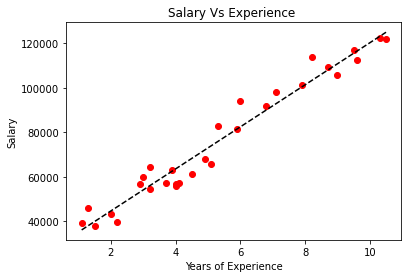

In [14]:
# From the OLS model, generate a graph showing the degree of adjustment of the line to the test data
print(OLS_model.params)
alpha = OLS_model.params[0]  #const
beta = OLS_model.params[1]  
Y = [alpha+beta*i for i in wage['YearsExperience']]
plt.scatter(x = wage['YearsExperience'], y = wage['Salary'], c = 'r')
plt.plot(wage['YearsExperience'], Y, color = 'k', ls = '--')
plt.title("Salary Vs Experience ")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()
